 # Пример использования бутстрапа

Загрузим библиотеки

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

Сформируем рандомные датасеты. Пусть есть две выборки событий конверсий (1 и 0). У одной выборки средняя конверсия 12%, а у другой - 15%. Выборки почти одного размера.

In [ ]:
convert_1=0.12

In [ ]:
convert_2=0.15

In [ ]:
size_old=125000

In [ ]:
size_new=150000

In [ ]:
new_page_converted = np.random.binomial(1, convert_1, size_new)
old_page_converted = np.random.binomial(1, convert_2, size_old)

In [ ]:
new_page_converted=pd.DataFrame(new_page_converted)
old_page_converted=pd.DataFrame(old_page_converted)

In [ ]:
new_page_converted.columns=['target_metric']
old_page_converted.columns=['target_metric']

Необходимо проверить, значима ли эта разница или нет. При этом мы закладываем определенный уровень alpha

In [ ]:
alpha=0.05

Метод бутстрапа заключается в том, что мы формируем выборки, проводя семплирование с возвратом из исходных выборок, и считаем разницу между средним этих новых выборок. А далее рассчитываем доверительные интервалы и проверяем попал ли 0 в этот доверительный интервал или нет.

В следующем коде мы формируем эти рандомные выборки размера первоначальных выборок. Формируем мы 100 раз. Так что отмечу, что бутстрап позволяет делать выборки размера меньше, чем изначальные выборки.

In [ ]:
p_diffs = []
for i in range(100):
    sample_new_mean = new_page_converted.sample(frac=1, replace=True)['target_metric'].mean()
    sample_old_mean = old_page_converted.sample(frac=1, replace=True)['target_metric'].mean()
    p_diffs.append(sample_new_mean - sample_old_mean)

(array([ 7.,  8.,  9., 16., 17., 17., 13.,  6.,  4.,  3.]),
 array([-0.030956  , -0.03036173, -0.02976747, -0.0291732 , -0.02857893,
        -0.02798467, -0.0273904 , -0.02679613, -0.02620187, -0.0256076 ,
        -0.02501333]),
 <BarContainer object of 10 artists>)

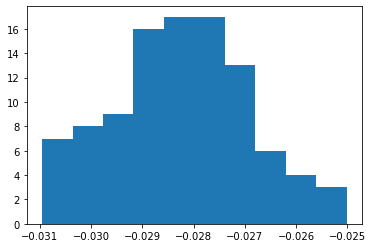

In [ ]:
plt.hist(p_diffs)

In [ ]:
p_diffs=pd.DataFrame(p_diffs)
p_diffs.columns=['mean_of_metric']

**Расчет границ доверительного интервала**

Так как у нас двустор

In [ ]:
A=p_diffs['mean_of_metric'].quantile(alpha/2)

In [ ]:
B= p_diffs['mean_of_metric'].quantile(1-alpha/2)

In [ ]:
print('Граница доверительного интервала:',A,B)

Граница доверительного интервала: -0.03070366666666667 -0.02561893333333334


Если 0 попадает в доверительный интервал, то разницы в средних нет. Если нет, то разница существует и мы должны принять альтернативную гипотезу.

В нашем случае 0 не попадает в доверительный интервал, а значит разница существует